In [1]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 12) #固定图像大小
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

## Perceptron algorithm

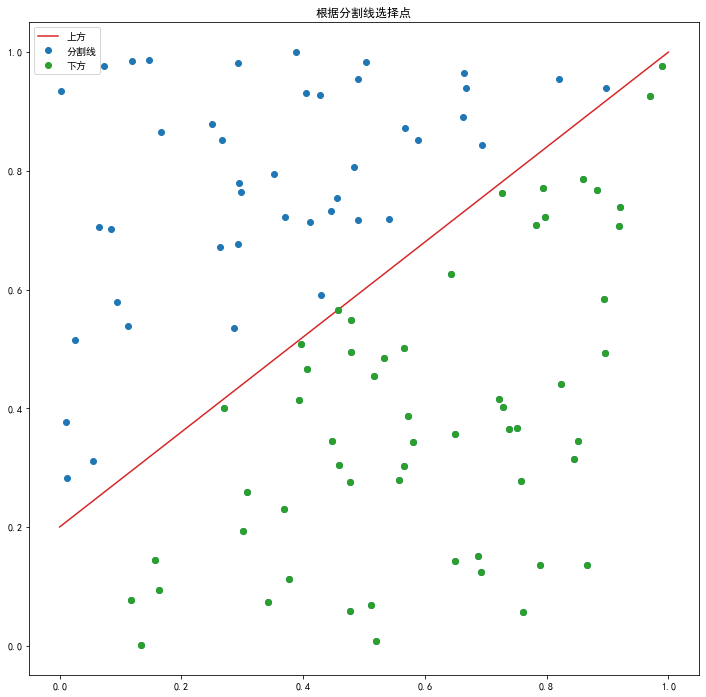

In [10]:
# 生成随机点
N = 100
xn = nr.rand(N, 2) # 第一列为横轴，第二列为纵轴
x = np.linspace(0, 1) # 选取[0,10]上的线性分布

# 选取一线性函数
# a, b = nr.rand(), nr.rand()
a, b = 0.8, 0.2
f = lambda x : a*x + b

#fig = plt.figure() # 创建图层
#figa = plt.gca() # get current axes 获取当前的坐标轴，处理坐标轴相关信息

plt.plot(x, f(x), 'tab:red')
dn = np.zeros([N, 1]) # 点在分割线上方为1，反之为-1

def print_base(xn, dn):
    plt.plot(xn[:,0], xn[:,1],  'o', color='tab:blue') # 蓝色，圆点
    for i in range(N):
        if (f(xn[i, 0]) > xn[i, 1]): # 分割线下方
            dn[i] = 1
            plt.plot(xn[i, 0], xn[i, 1], 'o', color='tab:green')
        else:
            dn[i] = -1 # 分割线上方


print_base(xn, dn)
plt.legend(['上方', '分割线', '下方'])
plt.title('根据分割线选择点')
plt.show()

现在假设我们不知道这条分割线，只能根据这些点的位置和它们所具有的两种性质，找到一条直线将它们分为两半，这就是最简单的分类算法，下面用二维分类问题举例。

假设一个点坐标为$(x_1,x_2)$，则可以记为为$\mathbf{x} = [1,x_1,x_2]^T$，这样方便写成直线的形式，记$\mathbf{w}=[w_0,w_1,w_2]^T$，则当前直线可以写为$l:w_0+w_1x_1+w_2x_2=\mathbf{x}^T\mathbf{w}$，假设当前的点的性质和$l$不符合，即它本应该在$l$下方但是它现在在$l$上方，则我们希望通过改变参数$\mathbf{w}$旋转或平移直线$l$，使得当前点的性质得以满足，将以上问题转化为下面这个优化问题：
$$\min\quad J(\mathbf{w})=\sum_{\mathbf{x_i}\in M}-d_i\cdot f(\mathbf{x_i})$$
具体解释可以看博客，通过最速下降法，即沿梯度方向更新$\mathbf{w}$，得到如下更新$\mathbf{w}$的方法：
$$\mathbf{w}'=\mathbf{w}-\eta d\cdot\mathbf{x}$$
其中$\eta$为学习系数，即每次更新的权重，下面代码中直接取值为$\eta=1$，通过代码运行可以看出迭代效果

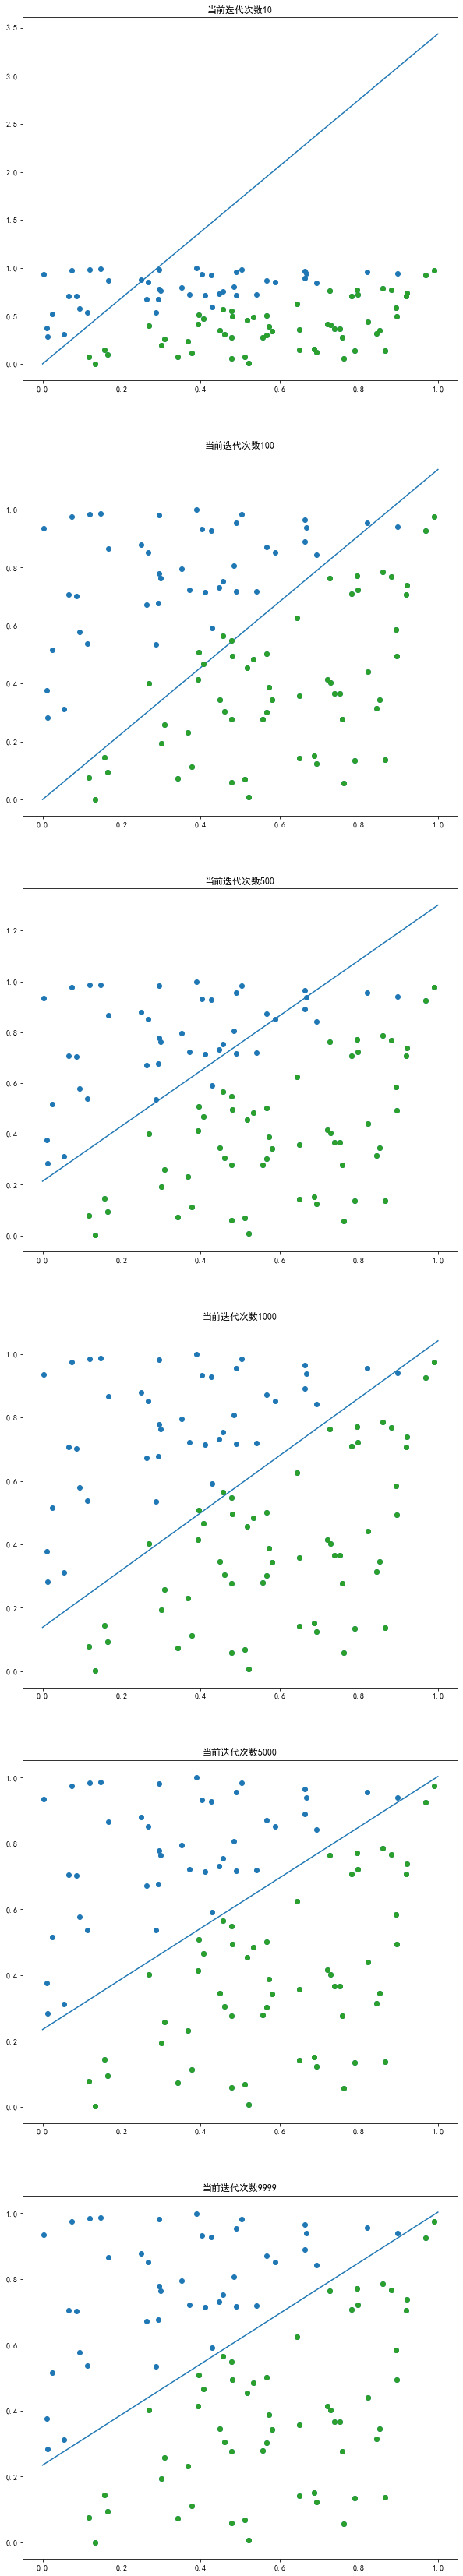

In [15]:
def print_per(xn, dn, w): # 打印图像
    if (w[2] == 0):
        return
    y = lambda x: -w[0]/w[2] - w[1]/w[2]*x
    x = np.linspace(0, 1)
    plt.plot(x, y(x), 'tab:blue')
    print_base(xn, dn)
    

def perceptron(xn, dn, max_iter=10000, w=np.zeros(3)):
    '''
    二维分类问题
    Input:
        xn: 数据点，Nx2矩阵
        dn: 分类标准，Nx1矩阵
        max_iter: 最大迭代次数
        w: 初始化参数矩阵
    Output:
        w: 迭代结果，最优分类曲线
    '''
    f = lambda x: np.sign(w[0] + w[1] * x[0] + w[2] * x[1]) #当前点x在f的上方则返回正数
    now = 1
    plt.figure(figsize=(10, 60))
    chk = [10, 100, 500, 1000, 5000, 9999]
    for _ in range(max_iter):
        i = nr.randint(N)
        if (_ in chk):
            plt.subplot(6, 1, now)
            plt.title('当前迭代次数'+str(_))
            now += 1
            print_per(xn, dn, w)
        if (dn[i] != f(xn[i,:])): # 如果分类错误，则进行修正曲线
            w[0] += dn[i]
            w[1] += dn[i] * xn[i,0]
            w[2] += dn[i] * xn[i,1]
    plt.show()
    return w

w = perceptron(xn, dn)

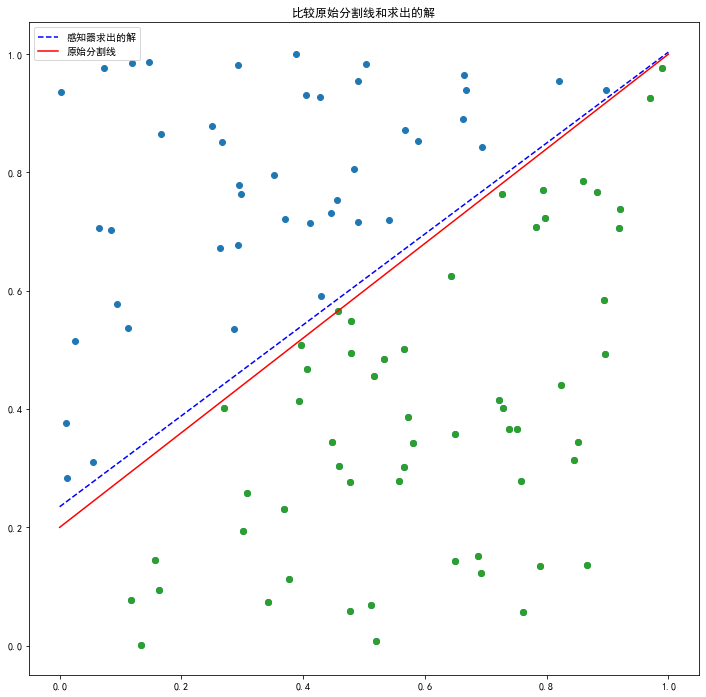

In [17]:
plt.figure();

print_base(xn, dn)
y = lambda x: -w[0]/w[2] - w[1]/w[2]*x
plt.plot(x,y(x),'b--',label='感知器求出的解')
plt.plot(x,f(x),'r',label='原始分割线')
plt.legend()

plt.title('比较原始分割线和求出的解')
plt.show()